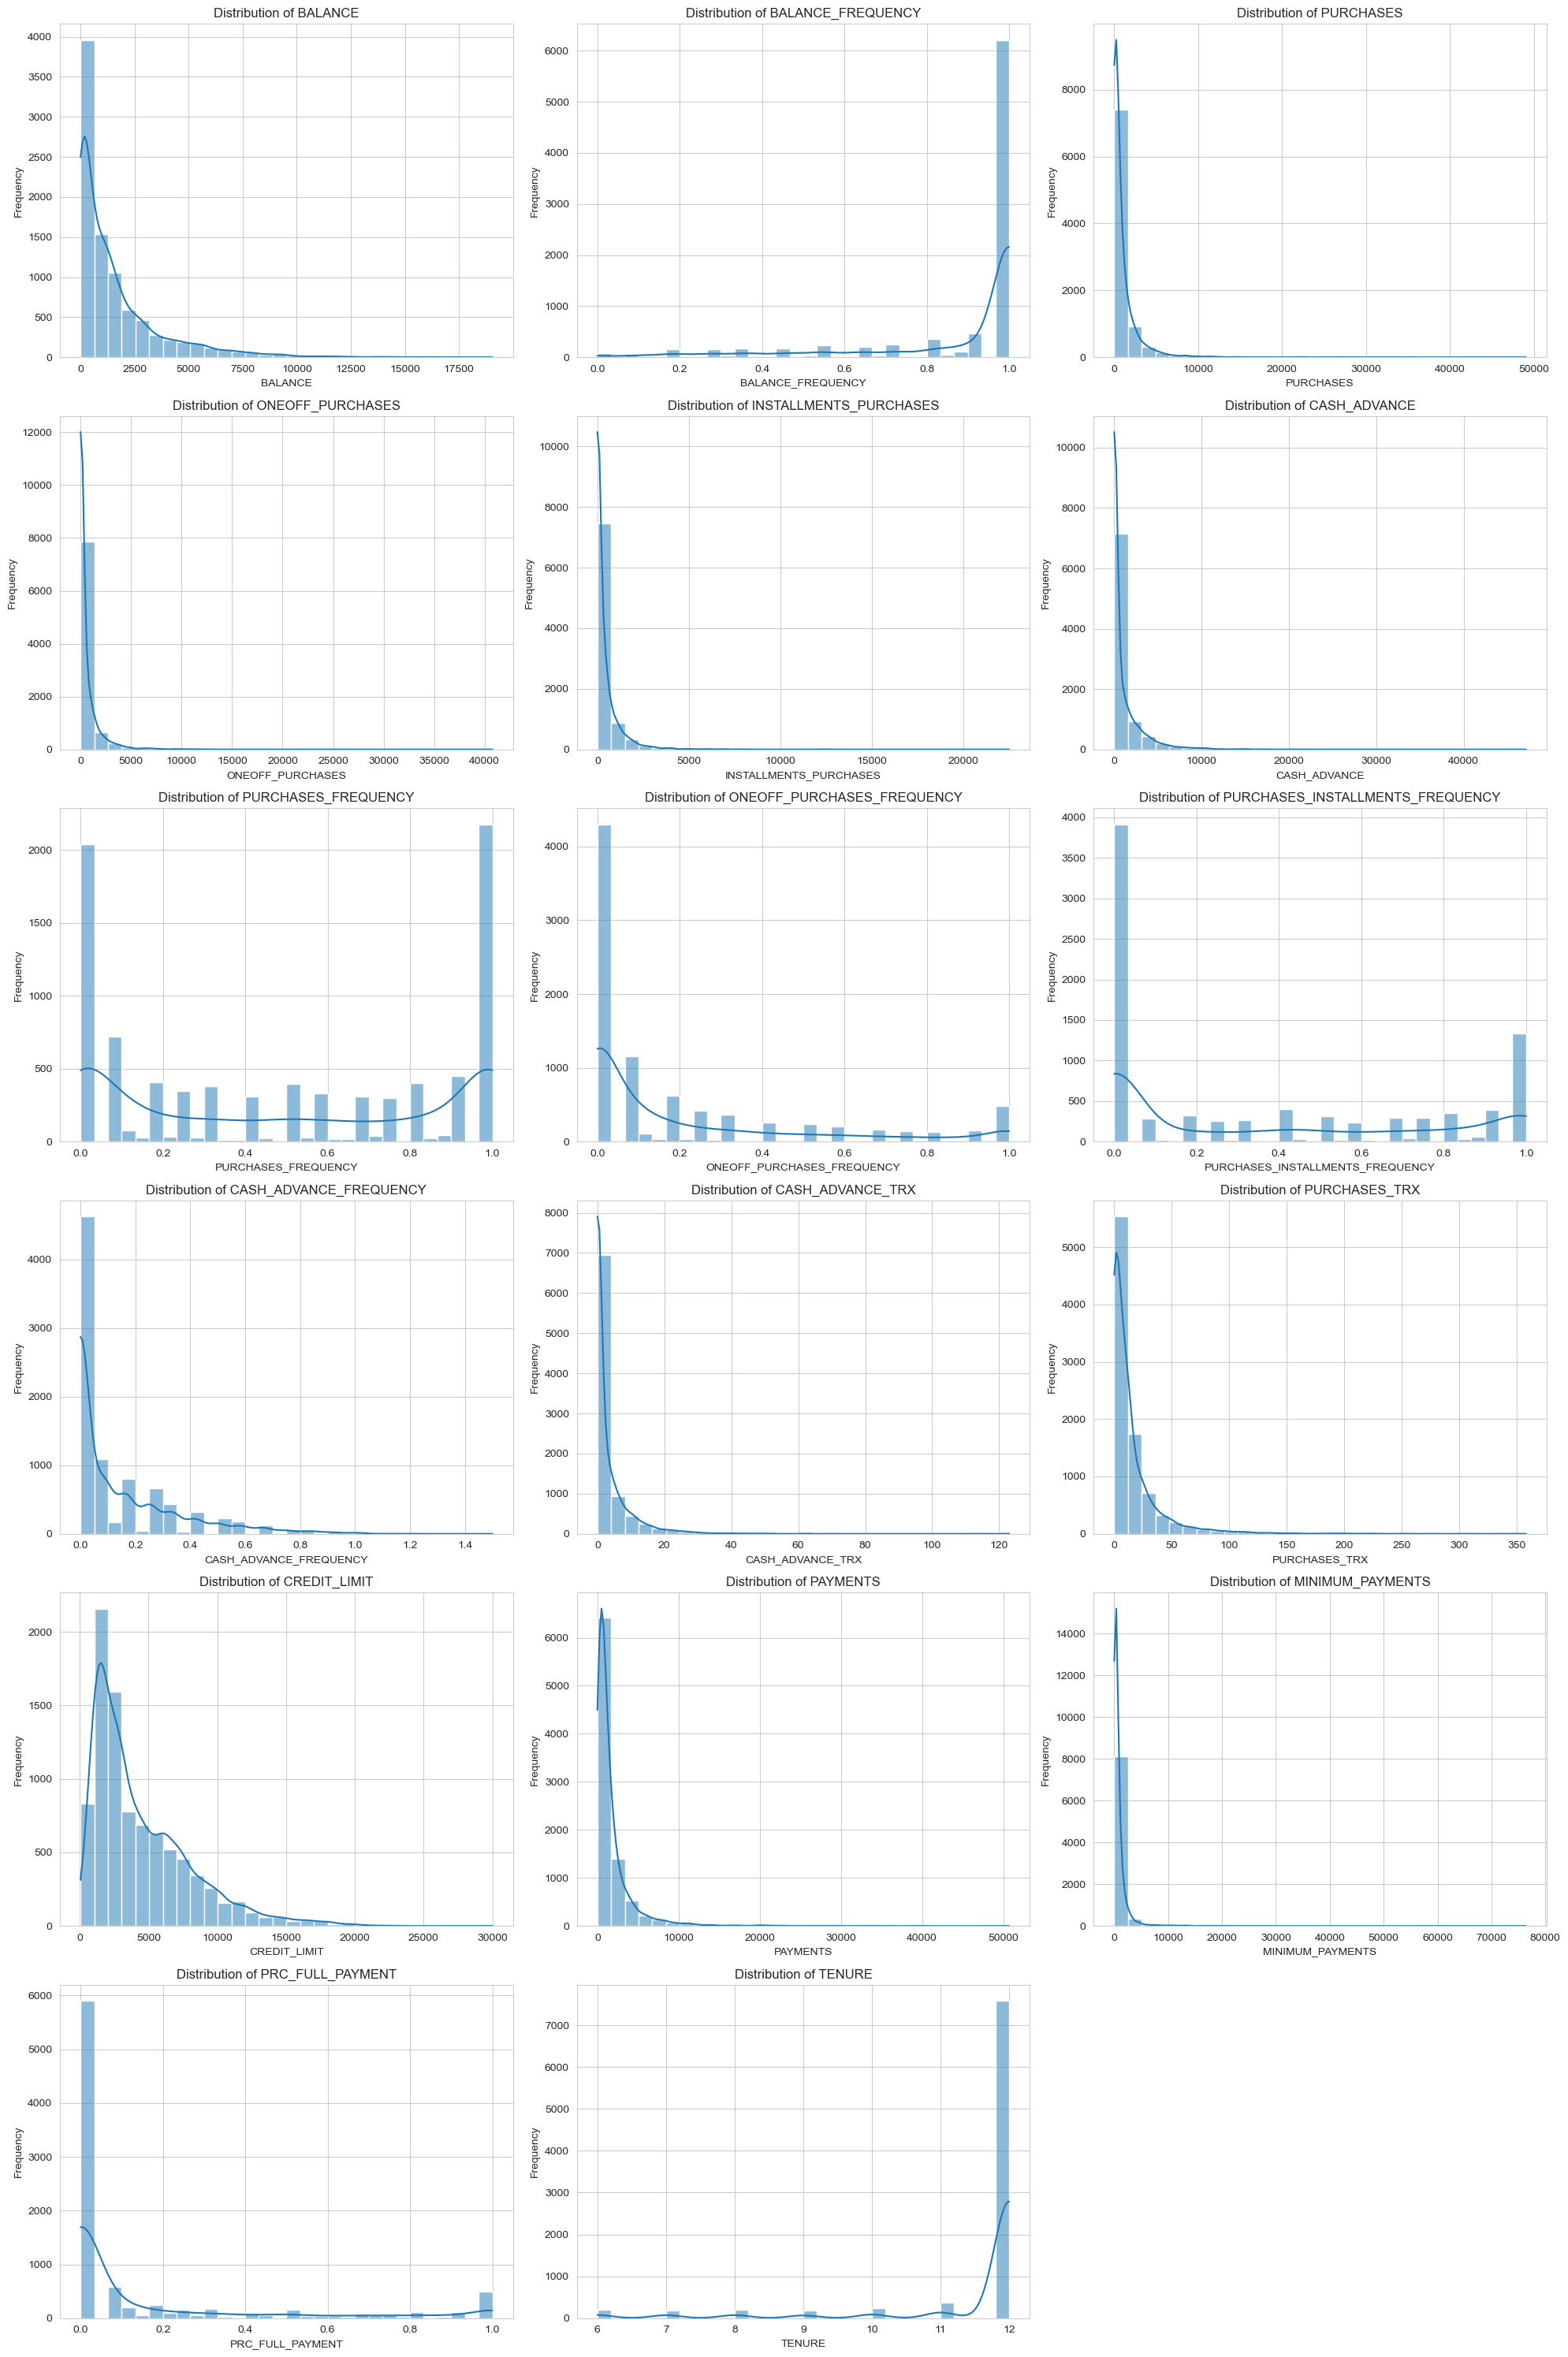

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("CC GENERAL.csv")
df.drop("CUST_ID",axis=1,inplace=True)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

sns.set_style('whitegrid')

n_cols = 3   
n_rows = -(-len(numeric_cols) // n_cols) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*5))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


C:\Users\JHANANISHRI\AppData\Local\Temp\ipykernel_25408\2864372104.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
C:\Users\JHANANISHRI\AppData\Local\Temp\ipykernel_25408\2864372104.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

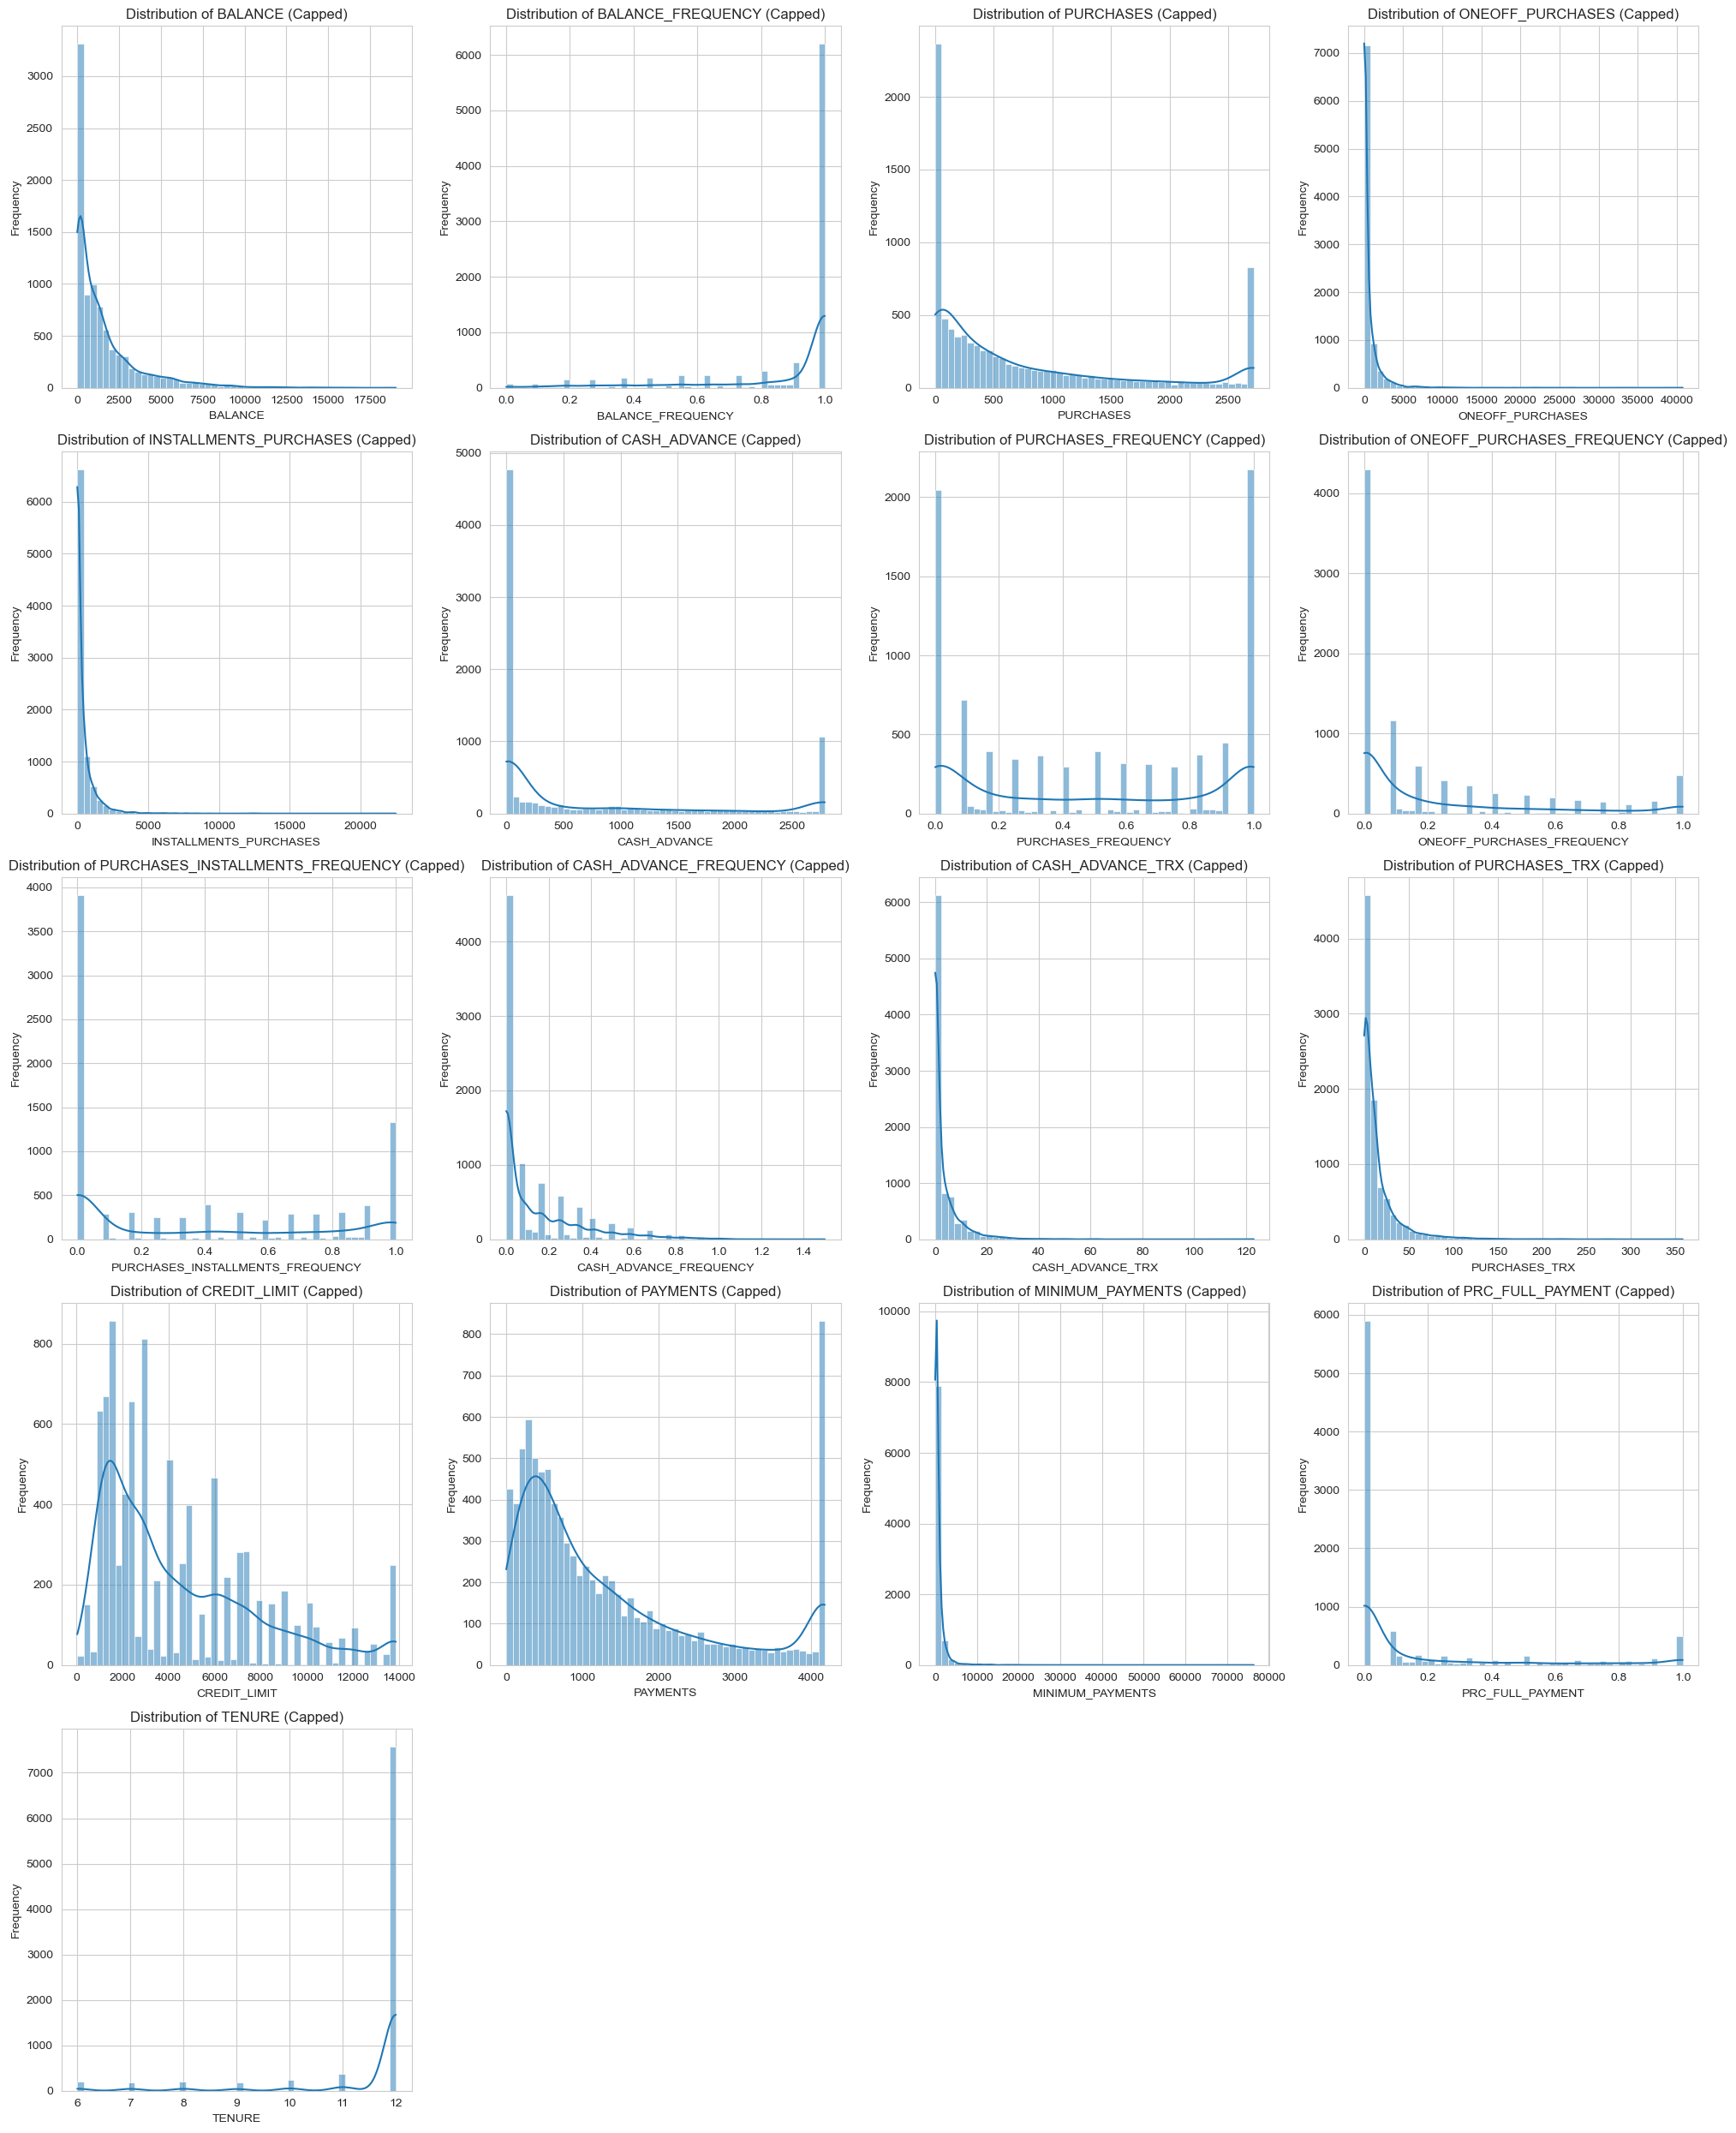

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler

df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in ['PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
robust_scaler = RobustScaler()
df_processed = robust_scaler.fit_transform(df[numeric_cols])
df_processed = pd.DataFrame(df_processed, columns=numeric_cols)

n_cols = 4  
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} (Capped)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
